#Fixed-Parameter Algorithms


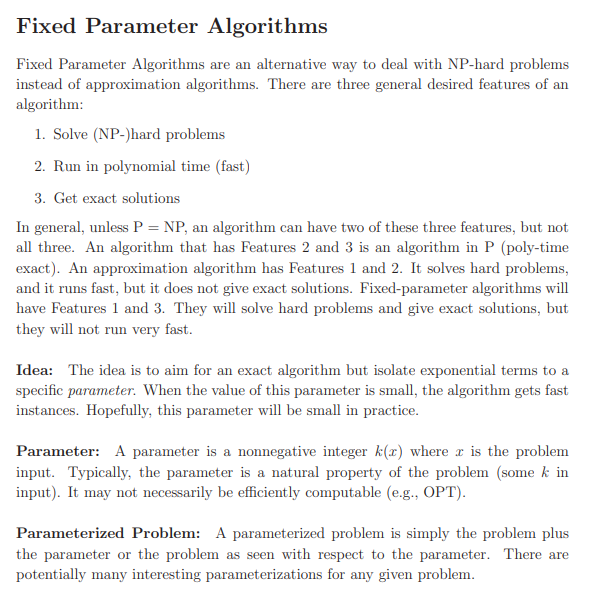

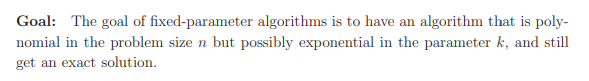

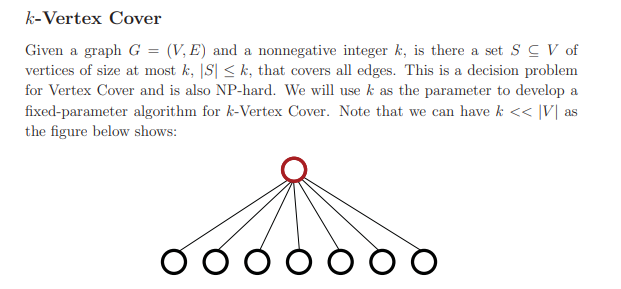

In [ ]:
class Graph:
    def __init__(self, V):
        self.V = V  # Number of vertices
        self.adj = [[] for _ in range(V)]  # Adjacency list
        self.edges = set()  # Set to store unique edges

    def add_edge(self, u, v):
        self.adj[u].append(v)
        self.adj[v].append(u)
        # Add the edge as a tuple (sorted for uniqueness)
        self.edges.add(tuple(sorted((u, v))))

def is_vertex_cover(graph, cover, k):
    """ Check if 'cover' is a vertex cover of size <= k """
    if len(cover) > k:
        return False

    covered_edges = set()
    for v in cover:
        for neighbor in graph.adj[v]:
            if neighbor not in cover:
                # Create a sorted tuple to represent the edge
                edge = tuple(sorted((v, neighbor)))
                covered_edges.add(edge)

    return len(covered_edges) == len(graph.edges)

def vertex_cover(graph, k, current_vertex, current_cover, best_cover):
    """ Bounded DFS to find a vertex cover of size <= k """
    if len(current_cover) > k:
        return

    if current_vertex == graph.V:
        if is_vertex_cover(graph, current_cover, k) and len(current_cover) < len(best_cover):
            best_cover[:] = current_cover[:]  # Update best cover found
        return

    # Choose to include the current_vertex in the cover
    current_cover.append(current_vertex)
    vertex_cover(graph, k, current_vertex + 1, current_cover, best_cover)
    current_cover.pop()

    # Choose to exclude the current_vertex from the cover
    vertex_cover(graph, k, current_vertex + 1, current_cover, best_cover)

def find_vertex_cover(graph, k):
    cover = []
    best_cover = list(range(graph.V))  # Initialize with worst case cover (all vertices)
    vertex_cover(graph, k, 0, [], best_cover)
    return best_cover[:k]  # Return the first k vertices of the best cover found

# Example Usage:
if __name__ == "__main__":
    # Create a sample graph (unweighted, undirected)
    V = 5  # Number of vertices
    edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)]
    graph = Graph(V)
    for u, v in edges:
        graph.add_edge(u, v)

    k = 2  # Maximum size of the vertex cover
    best_cover = find_vertex_cover(graph, k)

    print("Minimum Vertex Cover of size <= {}: {}".format(k, best_cover))


Minimum Vertex Cover of size <= 2: [0, 1]


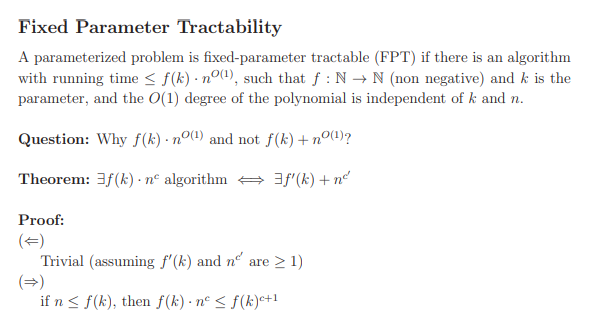

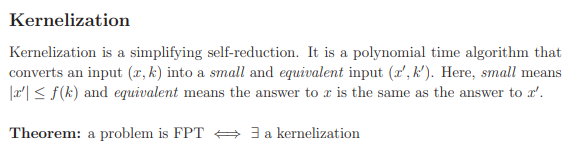

#Vertex Cover Problem

In [ ]:
from collections import defaultdict
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def vertex_cover(self, k):
        def is_vertex_cover(cover_set):
            for u in range(self.V):
                if u not in cover_set:
                    for v in self.graph[u]:
                        if v not in cover_set:
                            return False
            return True

        def vertex_cover_util(k, curr_cover, pos):
            if k == 0:
                if is_vertex_cover(curr_cover):
                    return True
                return False

            if pos == self.V:
                return False

            curr_cover.append(pos)
            if vertex_cover_util(k - 1, curr_cover, pos + 1):
                return True

            curr_cover.pop()
            return vertex_cover_util(k, curr_cover, pos + 1)

        cover_set = []
        if vertex_cover_util(k, cover_set, 0):
            return cover_set
        return None

# Example usage:
g = Graph(6)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 5)

k = 2
vertex_cover = g.vertex_cover(k)
if vertex_cover:
    print("Vertex cover of size", k, ":", vertex_cover)
else:
    print("No vertex cover of size", k, "found.")

Vertex cover of size 2 : [1, 2]


#Dominating Set Problem

In [ ]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def dominating_set(self, k):
        def is_dominating_set(dom_set):
            uncovered = set(range(self.V))
            for v in dom_set:
                uncovered -= set([v] + self.graph[v])
            return not uncovered

        def dominating_set_util(k, curr_dom_set, pos):
            if k == 0:
                if is_dominating_set(curr_dom_set):
                    return True
                return False

            if pos == self.V:
                return False

            curr_dom_set.append(pos)
            if dominating_set_util(k - 1, curr_dom_set, pos + 1):
                return True

            curr_dom_set.pop()
            return dominating_set_util(k, curr_dom_set, pos + 1)

        dom_set = []
        if dominating_set_util(k, dom_set, 0):
            return dom_set
        return None

# Example usage:
g = Graph(6)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 5)

k = 2
dom_set = g.dominating_set(k)
if dom_set:
    print("Dominating set of size", k, ":", dom_set)
else:
    print("No dominating set of size", k, "found.")

Dominating set of size 2 : [1, 2]


#Feedback Vertex Set Problem

In [ ]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def feedback_vertex_set(self, k):
        def is_feedback_vertex_set(fvs):
            visited = set()
            for v in fvs:
                if v in visited:
                    return False
                visited.add(v)
                for neighbor in self.graph[v]:
                    if neighbor not in fvs:
                        visited.add(neighbor)
            return True

        def feedback_vertex_set_util(k, curr_fvs, pos):
            if k == 0:
                if is_feedback_vertex_set(curr_fvs):
                    return True
                return False

            if pos == self.V:
                return False

            curr_fvs.append(pos)
            if feedback_vertex_set_util(k - 1, curr_fvs, pos + 1):
                return True

            curr_fvs.pop()
            return feedback_vertex_set_util(k, curr_fvs, pos + 1)

        fvs = []
        if feedback_vertex_set_util(k, fvs, 0):
            return fvs
        return None

# Example usage:
g = Graph(6)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 5)

k = 2
fvs = g.feedback_vertex_set(k)
if fvs:
    print("Feedback vertex set of size", k, ":", fvs)
else:
    print("No feedback vertex set of size", k, "found.")

Feedback vertex set of size 2 : [0, 1]


#Edge Dominating Set Problem

In [ ]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def edge_dominating_set(self, k):
        def is_edge_dominating_set(eds):
            uncovered = set(range(self.V))
            for u, v in eds:
                uncovered -= set([u, v])
                for neighbor in self.graph[u] + self.graph[v]:
                    if neighbor not in eds:
                        uncovered.add(neighbor)
            return not uncovered

        def edge_dominating_set_util(k, curr_eds, pos):
            if k == 0:
                if is_edge_dominating_set(curr_eds):
                    return True
                return False

            if pos == self.V:
                return False

            for neighbor in self.graph[pos]:
                if neighbor > pos:  # Avoid duplicate edges
                    curr_eds.append((pos, neighbor))
                    if edge_dominating_set_util(k - 1, curr_eds, pos + 1):
                        return True
                    curr_eds.pop()

            return edge_dominating_set_util(k, curr_eds, pos + 1)

        eds = []
        if edge_dominating_set_util(k, eds, 0):
            return eds
        return None

# Example usage:
g = Graph(6)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 5)

k = 2
eds = g.edge_dominating_set(k)
if eds:
    print("Edge dominating set of size", k, ":", eds)
else:
    print("No edge dominating set of size", k, "found.")

No edge dominating set of size 2 found.


#Clique Problem

In [ ]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0] * vertices for _ in range(vertices)]

    def add_edge(self, u, v):
        self.graph[u][v] = 1
        self.graph[v][u] = 1

    def is_clique(self, clique):
        for i in range(len(clique)):
            for j in range(i + 1, len(clique)):
                if not self.graph[clique[i]][clique[j]]:
                    return False
        return True

    def find_clique(self, k, curr_clique, pos):
        if len(curr_clique) == k:
            if self.is_clique(curr_clique):
                return curr_clique
            return None

        if pos == self.V:
            return None

        curr_clique.append(pos)
        clique = self.find_clique(k, curr_clique, pos + 1)
        if clique:
            return clique

        curr_clique.pop()
        return self.find_clique(k, curr_clique, pos + 1)

# Example usage:
g = Graph(5)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(2, 3)
g.add_edge(3, 4)

k = 3
clique = g.find_clique(k, [], 0)
if clique:
    print("Clique of size", k, ":", clique)
else:
    print("No clique of size", k, "found.")

Clique of size 3 : [0, 1, 2]
